## Valores atípicos

Un valor atípico o outlier es un punto de observación dentro de un conjunto de datos que es diferentes del resto de los puntos.

Estos valores pueden deberse a un error cometido durante el proceso de obtención y recolección de datos o pueden representar una varianza real en los valores del dataset. Dependiendo del caso pueden ser tratados de diferente manera.



## Encontrar valores atípicos


In [1]:
import pandas as pd
import requests
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Leer csv
df = pd.read_csv('../data/wine/winequality-red.csv')

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,76.00,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,98.00,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,92.00,15.0,54.0,997.00000,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,75.00,17.0,60.0,998.00000,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,76.00,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.60,0.08,2.0,0.09,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.55,0.10,2.2,62.00,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.51,0.13,2.3,76.00,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,645.00,0.12,2.0,75.00,32.0,44.0,0.99547,3.57,0.71,10.2,5


Mostrar características estadísticas de los elementos

In [2]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,84.830550,0.270976,2.538806,77.470294,15.874922,46.467792,58.321478,3.311113,0.658149,10.422983,5.636023
std,1.741096,234.417251,0.194801,1.409928,51.628973,10.460157,32.895324,232.081972,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.050000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.400000,0.090000,1.900000,65.000000,7.000000,22.000000,0.995640,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,77.000000,14.000000,38.000000,0.996800,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.660000,0.420000,2.600000,88.000000,21.000000,62.000000,0.998160,3.400000,0.730000,11.100000,6.000000
max,15.900000,1185.000000,1.000000,15.500000,611.000000,72.000000,289.000000,1001.000000,4.010000,2.000000,14.900000,8.000000


### IQR Score

El rango intercuartílico o Interquartile Range es la diferencia entre el tercer y el primer cuartil de una distribución. 

Muestra la tendencia central de los datos.

IQR = Q3 − Q1

Se asume que cualquier valor fuera de este rango es un valor atípico

In [3]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

fixed acidity            2.10000
volatile acidity         0.26000
citric acid              0.33000
residual sugar           0.70000
chlorides               23.00000
free sulfur dioxide     14.00000
total sulfur dioxide    40.00000
density                  0.00252
pH                       0.19000
sulphates                0.18000
alcohol                  1.60000
quality                  1.00000
dtype: float64


In [4]:
# Rangos normales de datos
rango_inferior = Q1 - 1.5 * IQR
rango_superior = Q3 + 1.5 * IQR

print("Rango superior")
print(rango_inferior)
print("Rango inferior")
print(rango_superior)

Rango superior
fixed acidity            3.95000
volatile acidity         0.01000
citric acid             -0.40500
residual sugar           0.85000
chlorides               30.50000
free sulfur dioxide    -14.00000
total sulfur dioxide   -38.00000
density                  0.99186
pH                       2.92500
sulphates                0.28000
alcohol                  7.10000
quality                  3.50000
dtype: float64
Rango inferior
fixed acidity            12.35000
volatile acidity          1.05000
citric acid               0.91500
residual sugar            3.65000
chlorides               122.50000
free sulfur dioxide      42.00000
total sulfur dioxide    122.00000
density                   1.00194
pH                        3.68500
sulphates                 1.00000
alcohol                  13.50000
quality                   7.50000
dtype: float64


In [5]:
#Mostrar si un valor es atípico o no
df_outliers = (df < rango_inferior) | (df > rango_superior)
df_outliers

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,True,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,True,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

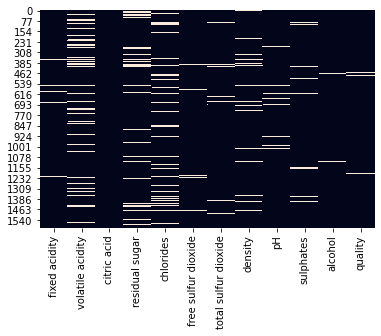

In [6]:
#Mostar mapa de calor para identificar los valores atípicos
sns.heatmap(df_outliers, cbar=False)

### Box plot

Un diagrama de caja o box plot es un gráfico que representa una serie de daots numéricos a partir de sus cuartiles.
<img src="https://upload.wikimedia.org/wikipedia/commons/4/4a/Diagrama_de_caja.jpg">

<AxesSubplot:>

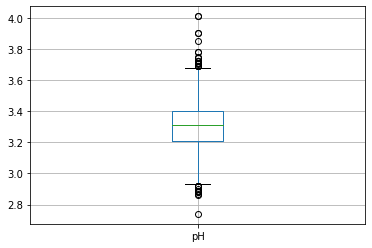

In [7]:
# Mostrar boxplot de un atributo
df.boxplot(column='pH')

<AxesSubplot:title={'center':'pH'}, xlabel='quality'>

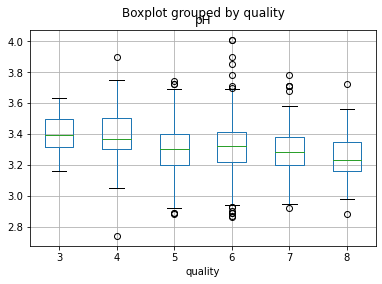

In [8]:
# Mostrar boxplot de un atributo dividio por categoría
df.boxplot(column='pH', by='quality')

<AxesSubplot:xlabel='pH'>

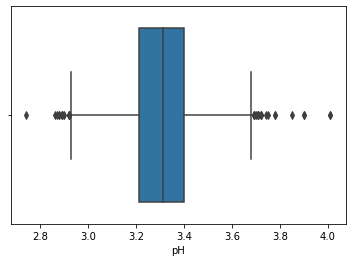

In [9]:
# Mostrar boxplot de un atributo
sns.boxplot(x=df['pH'])

<AxesSubplot:xlabel='quality', ylabel='pH'>

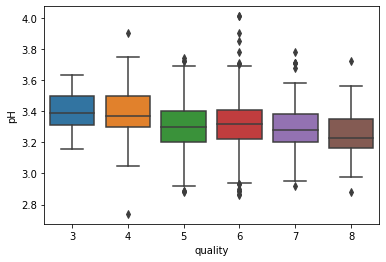

In [10]:
# Mostrar boxplot de un atributo dividio por categoría
sns.boxplot(y=df['pH'],x=df['quality'])

### Scatter Plot

Los gráficos de disperción pueden mostrar visualmente cuando existen datos que se separan de los valores comunes del atributo

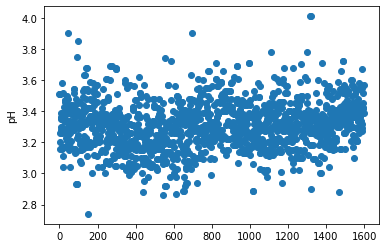

In [11]:
plt.scatter(df.index,df["pH"])
plt.ylabel('pH')
plt.show()

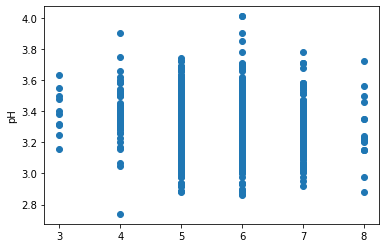

In [12]:
# Valor del atributo separado por categoría
plt.scatter(df["quality"], df["pH"])
plt.ylabel('pH')
plt.show() 

### Histogram

El histograma muestra la frecuencia en la que aparecen los valores para un atributo específico. Nos permite ver ocurrencias de valores extremos.

<AxesSubplot:>

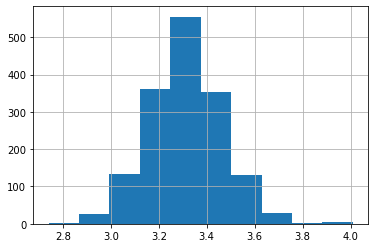

In [13]:
df.pH.hist()

## Tratamiento

### Flooring and Capping basado en cuartiles

Se reemplazan los valores más bajos con el valor correspondiente a uno de los percentiles más bajos y los mal altos por el valor correspondiente a uno de los percentiles más altos.

In [14]:
pH_q_sup = df['pH'].quantile(0.90)
pH_q_inf = df['pH'].quantile(0.10)
print(pH_q_sup)
print(pH_q_inf)

3.51
3.12


In [15]:
df_fc = df.copy(deep = True)
df_fc.loc[df_fc["pH"] <= pH_q_inf,"pH"] = pH_q_inf
df_fc.loc[df_fc["pH"] >= pH_q_sup, "pH"] = pH_q_sup

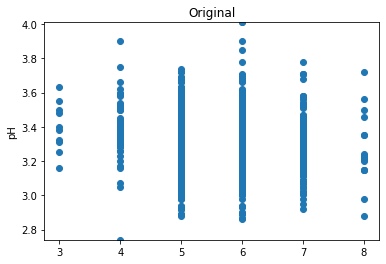

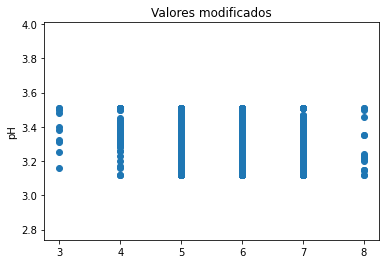

In [16]:
plt.scatter(df["quality"], df["pH"])
plt.title('Original')
plt.ylim(min(df['pH']),max(df['pH']))
plt.ylabel('pH')
plt.show() 

plt.scatter(df_fc["quality"], df_fc["pH"])
plt.title('Valores modificados')
plt.ylim(min(df['pH']),max(df['pH']))
plt.ylabel('pH')
plt.show() 

[(2.74, 4.01)]

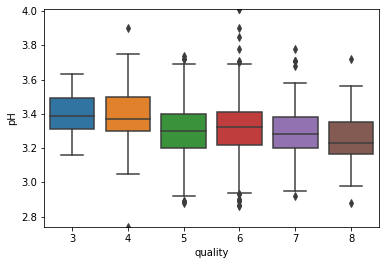

In [17]:
a = sns.boxplot(y=df['pH'],x=df['quality'])
a.set(ylim=(min(df['pH']),max(df['pH'])))


[(2.74, 4.01)]

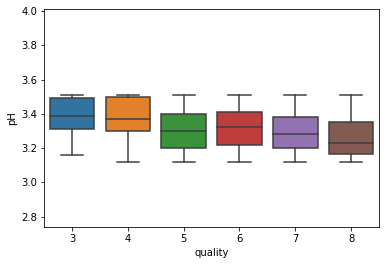

In [18]:
a = sns.boxplot(y=df_fc['pH'],x=df_fc['quality'])
a.set(ylim=(min(df['pH']),max(df['pH'])))

### Trimming

Eliminar los elementos que se encuentren fuera de ciertos cuartiles

In [19]:
pH_q_sup = df['pH'].quantile(0.98)
pH_q_inf = df['pH'].quantile(0.02)
df_tr = df.copy(deep = True)
index = df_tr[(df['pH'] >= pH_q_sup)|(df_tr['pH'] <= pH_q_inf)].index
df_tr.drop(index, inplace=True)

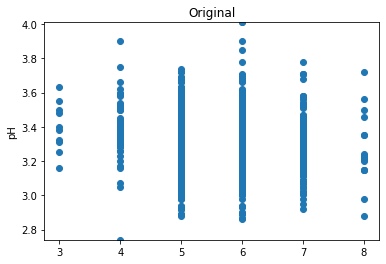

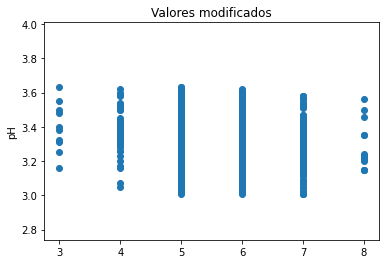

In [20]:
plt.scatter(df["quality"], df["pH"])
plt.ylim(min(df['pH']),max(df['pH']))
plt.title('Original')
plt.ylabel('pH')
plt.show() 

plt.scatter(df_tr["quality"], df_tr["pH"])
plt.ylim(min(df['pH']),max(df['pH']))
plt.title('Valores modificados')
plt.ylabel('pH')
plt.show() 


[(2.74, 4.01)]

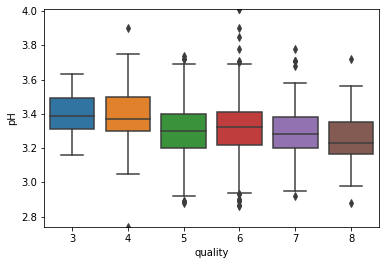

In [21]:
a = sns.boxplot(y=df['pH'],x=df['quality'])
a.set(ylim=(min(df['pH']),max(df['pH'])))

[(2.74, 4.01)]

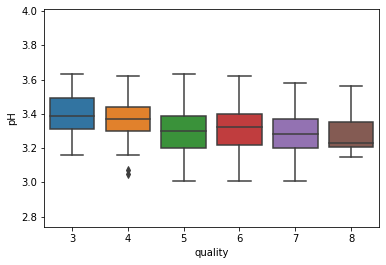

In [22]:
a = sns.boxplot(y=df_tr['pH'],x=df_tr['quality'])
a.set(ylim=(min(df['pH']),max(df['pH'])))

### IQR Score

Eliminar aquellos elementos que se consideren outliers de acuerdo con el valor IQR

In [23]:
pH_q_sup = df['pH'].quantile(0.98)
pH_q_inf = df['pH'].quantile(0.02)
df_IQR = df.copy(deep = True)
index = df_IQR[(df['pH'] >= rango_superior['pH'])|(df_IQR['pH'] <= rango_inferior['pH'])].index
df_IQR.drop(index, inplace=True)

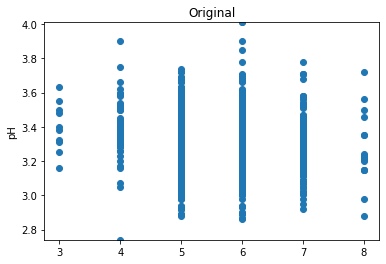

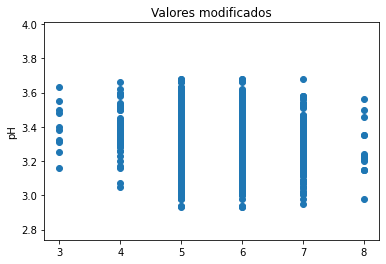

In [24]:
plt.scatter(df["quality"], df["pH"])
plt.ylim(min(df['pH']),max(df['pH']))
plt.title('Original')
plt.ylabel('pH')
plt.show()    

plt.scatter(df_IQR["quality"], df_IQR["pH"])
plt.ylim(min(df['pH']),max(df['pH']))
plt.title('Valores modificados')
plt.ylabel('pH')
plt.show() 



[(2.74, 4.01)]

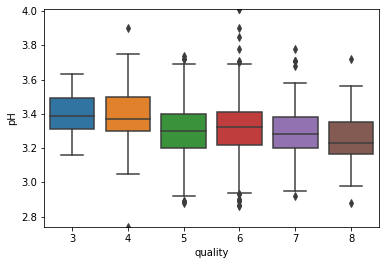

In [25]:
a = sns.boxplot(y=df['pH'],x=df['quality'])
a.set(ylim=(min(df['pH']),max(df['pH'])))

[(2.74, 4.01)]

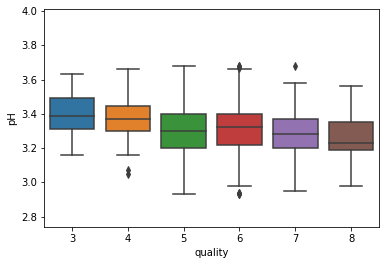

In [26]:
a = sns.boxplot(y=df_IQR['pH'],x=df_IQR['quality'])
a.set(ylim=(min(df['pH']),max(df['pH'])))

### Transformación logarítmica

Aplicar una transformación logarítmica sobre los elementos. Esto lo convierte en una distribucion normal pero cambia el valor y por lo tanto el significado de los datos. Es útil para los algoritmos de machine learning que requieren este tipo de distribución.

In [27]:
df_log = df.copy(deep = True)
df_log["pH"] = np.log(df_log["pH"]) 

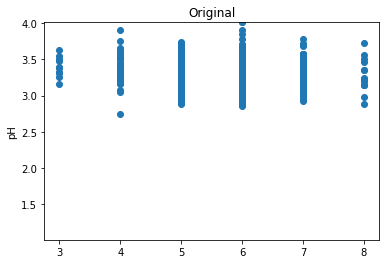

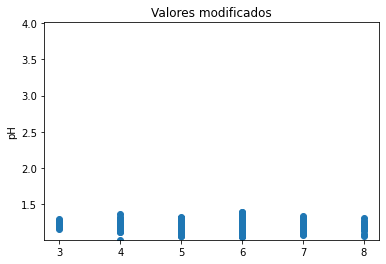

In [28]:
plt.scatter(df["quality"], df["pH"])
plt.title('Original')
plt.ylim(min(df_log['pH']),max(df['pH']))
plt.ylabel('pH')
plt.show() 

plt.scatter(df_log["quality"], df_log["pH"])
plt.title('Valores modificados')
plt.ylim(min(df_log['pH']),max(df['pH']))
plt.ylabel('pH')
plt.show() 

[(2.74, 4.01)]

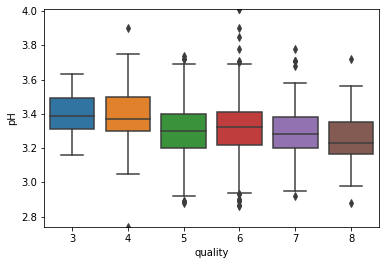

In [29]:
a = sns.boxplot(y=df['pH'],x=df['quality'])
a.set(ylim=(min(df['pH']),max(df['pH'])))

[(1.007957920399979, 4.01)]

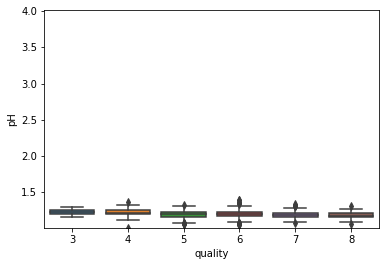

In [30]:
a = sns.boxplot(y=df_log['pH'],x=df_log['quality'])
a.set(ylim=(min(df_log['pH']),max(df['pH'])))